# **Preliminary Round FIT Competition 2024**

### **Description:**
Happiness of a city can be a reflection of government success in managing their people and country, not only focusing in physical fields like infrastructure, but also in social problems, economy, and culture. There are many variables that can affect the happiness index of a city, include High GDP per capita, social support in times of need, absence of corruption in government, healthy life expectancy, freedom to make life choices, and generosity or charity towards others.

### **Atribut:**
1.	id - City or Regency identifier
2.	city_or_regency - Name of City or Regency
3.	year - The year in which the data is recorded
4.	total_area - Area of City or Regency (KM^2)
5.	population - The Number of Residents in One City or Regency
6.	densities - Density Level (Population/KM^2)
7.	traffic_density - Categories for Traffic Density (Low/Medium/High)
8.	green_open_space - Area of Green Open Space (KM^2)
9.	hdi - Index of Human Development for Each City or Regency
10.	gross_regional_domestic_product - Total Gross Value Added at Current Prices (Billion Rupiah)
11.	total_landfills - Number of Landfills per City or Regency
12.	solid_waste_generated - The amount of waste each City or Regency generated from various sources for a year (Tens of Tons)
13.	happiness_score - Score to Measure The Level of Happiness for each city or Regency (0 - 100)

### **Business Understanding:**
1.	Background:
  - The happiness of a city is an important indicator of the well-being of its people. Governments are responsible for creating an environment that supports the happiness of citizens by managing various physical, social, economic and cultural aspects.
  - The City Happiness Index is influenced by various factors, including GDP per capita, social support, government corruption, life expectancy, freedom of choice, and generosity.
  - Understanding the factors that influence city happiness can help governments design effective policies to improve the well-being of citizens.
2.	Challenges:
  - Identify the variables that most significantly affect the happiness index.
  - Measure the impact of various social, economic, and environmental factors on citizens' happiness.
  - Collect and analyze data from various cities and districts with different characteristics.
3.	Opportunities:
  - The results of the analysis can provide valuable insights for the government and other stakeholders in designing better policies to improve citizens' happiness.
  - By identifying key factors that affect happiness, the government can allocate resources more efficiently and effectively.

### **Goals:**
  - Goals: Identify the variables that most significantly affect the happiness index of a city or district.
  - Key Performance Indicator: Regression coefficient and significance level for each variable in the regression analysis model.



In [37]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Collect the data
df = pd.read_csv('train.csv')
df

,id,city_or_regency,year,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score
0,11012022,Simeulue,2022,"1,838.09","94,876",51.62,Low,0.12,67.27,"2,688",1.0,"1,628.09",72.37
1,11032022,Aceh Selatan,2022,"4,173.82","237,376",56.87,Low,NaN,67.87,"6,447",1.0,"3,521.77",72.54
2,11042022,Aceh Tenggara,2022,"4,242.04","228,308",53.82,Low,NaN,70.32,"5,829",1.0,"3,333.30",72.38
3,11062022,Aceh Tengah,2022,"4,527.53","222,673",49.18,Low,1.11,73.95,"8,873",1.0,NaN,71.38
4,11072022,Aceh Barat,2022,"2,927.95","202,858",69.28,Low,0.01,72.34,"12,730",1.0,"3,702.16",72.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,94302023,Lanny Jaya,2023,"2,248.00","202,988",90.30,Low,NaN,50.56,"2,325",NaN,NaN,69.07
818,94312023,Mamberamo Tengah,2023,"3,743.64","49,131",13.12,Low,NaN,50.22,"1,408",NaN,NaN,71.41
819,94322023,Yalimo,2023,"4,330.29","104,416",24.11,Low,NaN,50.87,"1,559",NaN,NaN,71.10
820,94352023,Intan Jaya,2023,"3,922.02","136,756",34.87,Low,NaN,50.19,"1,405",NaN,NaN,71.29


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               822 non-null    int64  
 1   city_or_regency                  822 non-null    object 
 2   year                             822 non-null    int64  
 3   total_area (km2)                 822 non-null    object 
 4   population                       822 non-null    object 
 5   densities                        822 non-null    float64
 6   traffic_density                  822 non-null    object 
 7   green_open_space                 434 non-null    object 
 8   hdi                              822 non-null    float64
 9   gross_regional_domestic_product  822 non-null    object 
 10  total_landfills                  420 non-null    float64
 11  solid_waste_generated            428 non-null    object 
 12  happiness_score       

In [40]:
df.describe()

,id,year,densities,hdi,total_landfills,happiness_score
count,8.220000e+02,822.000000,822.000000,822.000000,420.000000,822.000000
mean,4.530244e+07,2022.500000,1159.968893,71.079745,1.264286,73.919246
std,2.649860e+07,0.500304,2689.298031,6.449038,0.854113,2.705407
min,1.101202e+07,2022.000000,0.000000,34.100000,1.000000,65.110000
25%,1.806202e+07,2022.000000,55.095000,67.922500,1.000000,71.990000
50%,3.529202e+07,2022.500000,169.990000,70.845000,1.000000,73.695000
75%,7.172952e+07,2023.000000,911.842500,74.350000,1.000000,75.622500
max,9.471202e+07,2023.000000,22150.590000,88.280000,8.000000,81.810000


## **Pre-processing**

In [41]:
# Ganti kolom objek ke numerik
object_columns = ['total_area (km2)', 'population', 'green_open_space',
                  'gross_regional_domestic_product', 'solid_waste_generated']

for col in object_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

In [42]:
# Mapping kolom traffic_density
df['traffic_density'] = df['traffic_density'].map({'Low': 1, 'Medium': 2, 'High': 3})

In [43]:
# Handle missing values/NaN dengan nilai 0
df = df.fillna(0)

In [44]:
df

,id,city_or_regency,year,total_area (km2),population,densities,traffic_density,green_open_space,hdi,gross_regional_domestic_product,total_landfills,solid_waste_generated,happiness_score
0,11012022,Simeulue,2022,1838.09,94876,51.62,1,0.12,67.27,2688,1.0,1628.09,72.37
1,11032022,Aceh Selatan,2022,4173.82,237376,56.87,1,0.00,67.87,6447,1.0,3521.77,72.54
2,11042022,Aceh Tenggara,2022,4242.04,228308,53.82,1,0.00,70.32,5829,1.0,3333.30,72.38
3,11062022,Aceh Tengah,2022,4527.53,222673,49.18,1,1.11,73.95,8873,1.0,0.00,71.38
4,11072022,Aceh Barat,2022,2927.95,202858,69.28,1,0.01,72.34,12730,1.0,3702.16,72.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,94302023,Lanny Jaya,2023,2248.00,202988,90.30,1,0.00,50.56,2325,0.0,0.00,69.07
818,94312023,Mamberamo Tengah,2023,3743.64,49131,13.12,1,0.00,50.22,1408,0.0,0.00,71.41
819,94322023,Yalimo,2023,4330.29,104416,24.11,1,0.00,50.87,1559,0.0,0.00,71.10
820,94352023,Intan Jaya,2023,3922.02,136756,34.87,1,0.00,50.19,1405,0.0,0.00,71.29


In [45]:
# Pemilihan fitur
features = df.drop(columns=['id', 'city_or_regency', 'year', 'happiness_score'])
target = df['happiness_score']

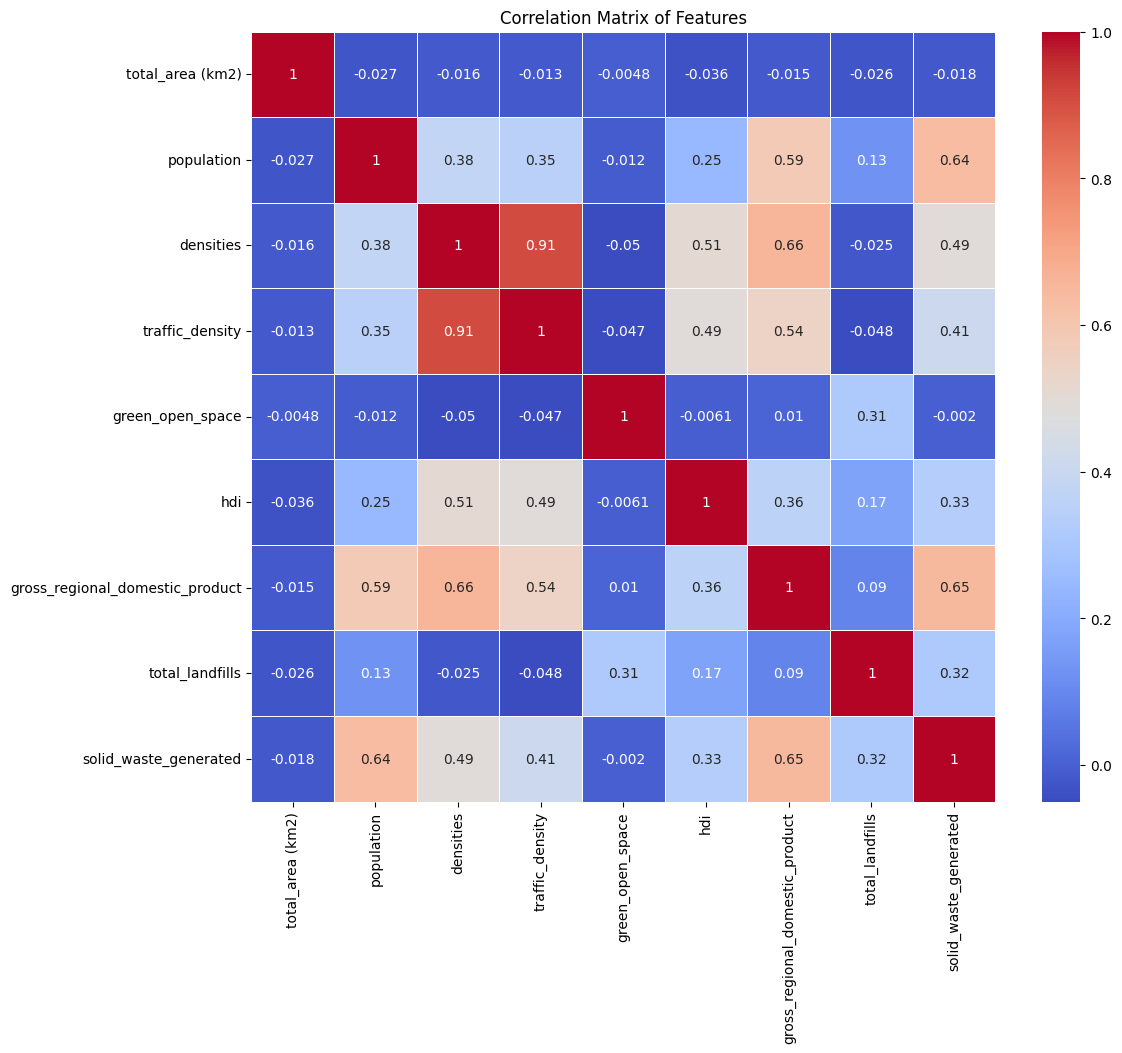

In [46]:
# Analisis korelasi
import seaborn as sns

correlation_matrix = features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [47]:
# Normalisasi fitur
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns=features.columns)

## **Split ke Train dan Test**

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
# Cross validation
cv_scores = cross_val_score(model, features_scaled, target, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross Validation RMSE: {cv_rmse.mean()} (+/- {cv_rmse.std() * 2})")

Cross Validation RMSE: 2.7451998261957806 (+/- 0.8495072943530801)


## **Evaluation**

In [51]:
# Dilakukan dengan prediksi pada data test, kemudian menampilkan nilai mse dan r2 nya
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

MSE: 5.745947856424205
R-squared: 0.15175509868867665


In [52]:
# Analisis feature importance
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [53]:
importance_df

,Feature,Importance
5,hdi,0.208395
2,densities,0.166774
1,population,0.164900
6,gross_regional_domestic_product,0.149725
0,total_area (km2),0.139312
4,green_open_space,0.082669
8,solid_waste_generated,0.069521
7,total_landfills,0.015484
3,traffic_density,0.003219


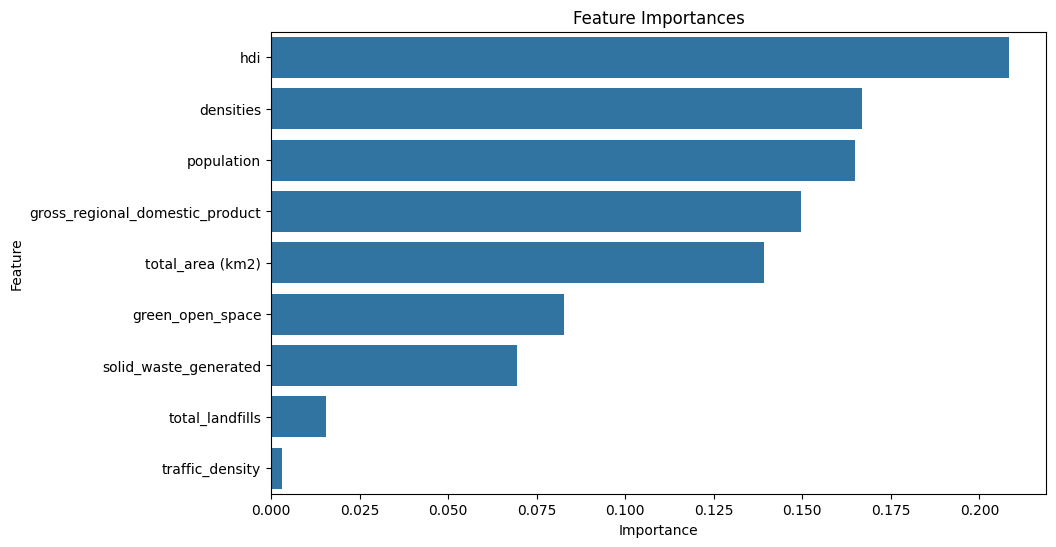

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()